___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
#data
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer, Normalizer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import pickle
from tensorflow.keras.models import load_model
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

CPU will be used for this session.


In [3]:
df = pd.read_csv('1-Churn_Modelling.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

In [6]:
df.corr()

RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067       0.007246   0.000599        0.012044   
CustomerId      -0.012419       0.016972  -0.014025        0.001665   
CreditScore      0.006268       0.012238  -0.005458        0.025651   
Age              0.028308      -0.030680  -0.011721        0.085472   
Tenure          -0.012254       0.013444   0.022583       -0.028362   
Balance          1.000000      -0.304180  -0.014858       -0.010084   
NumOfProducts   -0.304180       1.000000   0.003183        0.009612   
HasCrCard       -0.014858       0.003183   1.000000       -0.011866   
IsActiveMember  -0.010084       0.009612  -0.011866        1.000000   
EstimatedSalary  0.012797       0.014204  -0.009933       -0.011421   
Exited           0.118533      -0.047820  -0.007138       -0.156128   

                 EstimatedSalary    Exited  
RowNumber              -0.005988 -0.016571  
CustomerId              0.015271 -0.006248  
CreditScore            -0.001384 -0.027094  
Age                    -0.007201  0.285323  
Tenure                  0.007784 -0.014001  
Balance                 0.012797  0.118533  
NumOfProducts           0.014204 -0.047820  
HasCrCard              -0.009933 -0.007138  
IsActiveMember         -0.011421 -0.156128  
EstimatedSalary         1.000000  0.012097  
Exited                  0.012097  1.000000

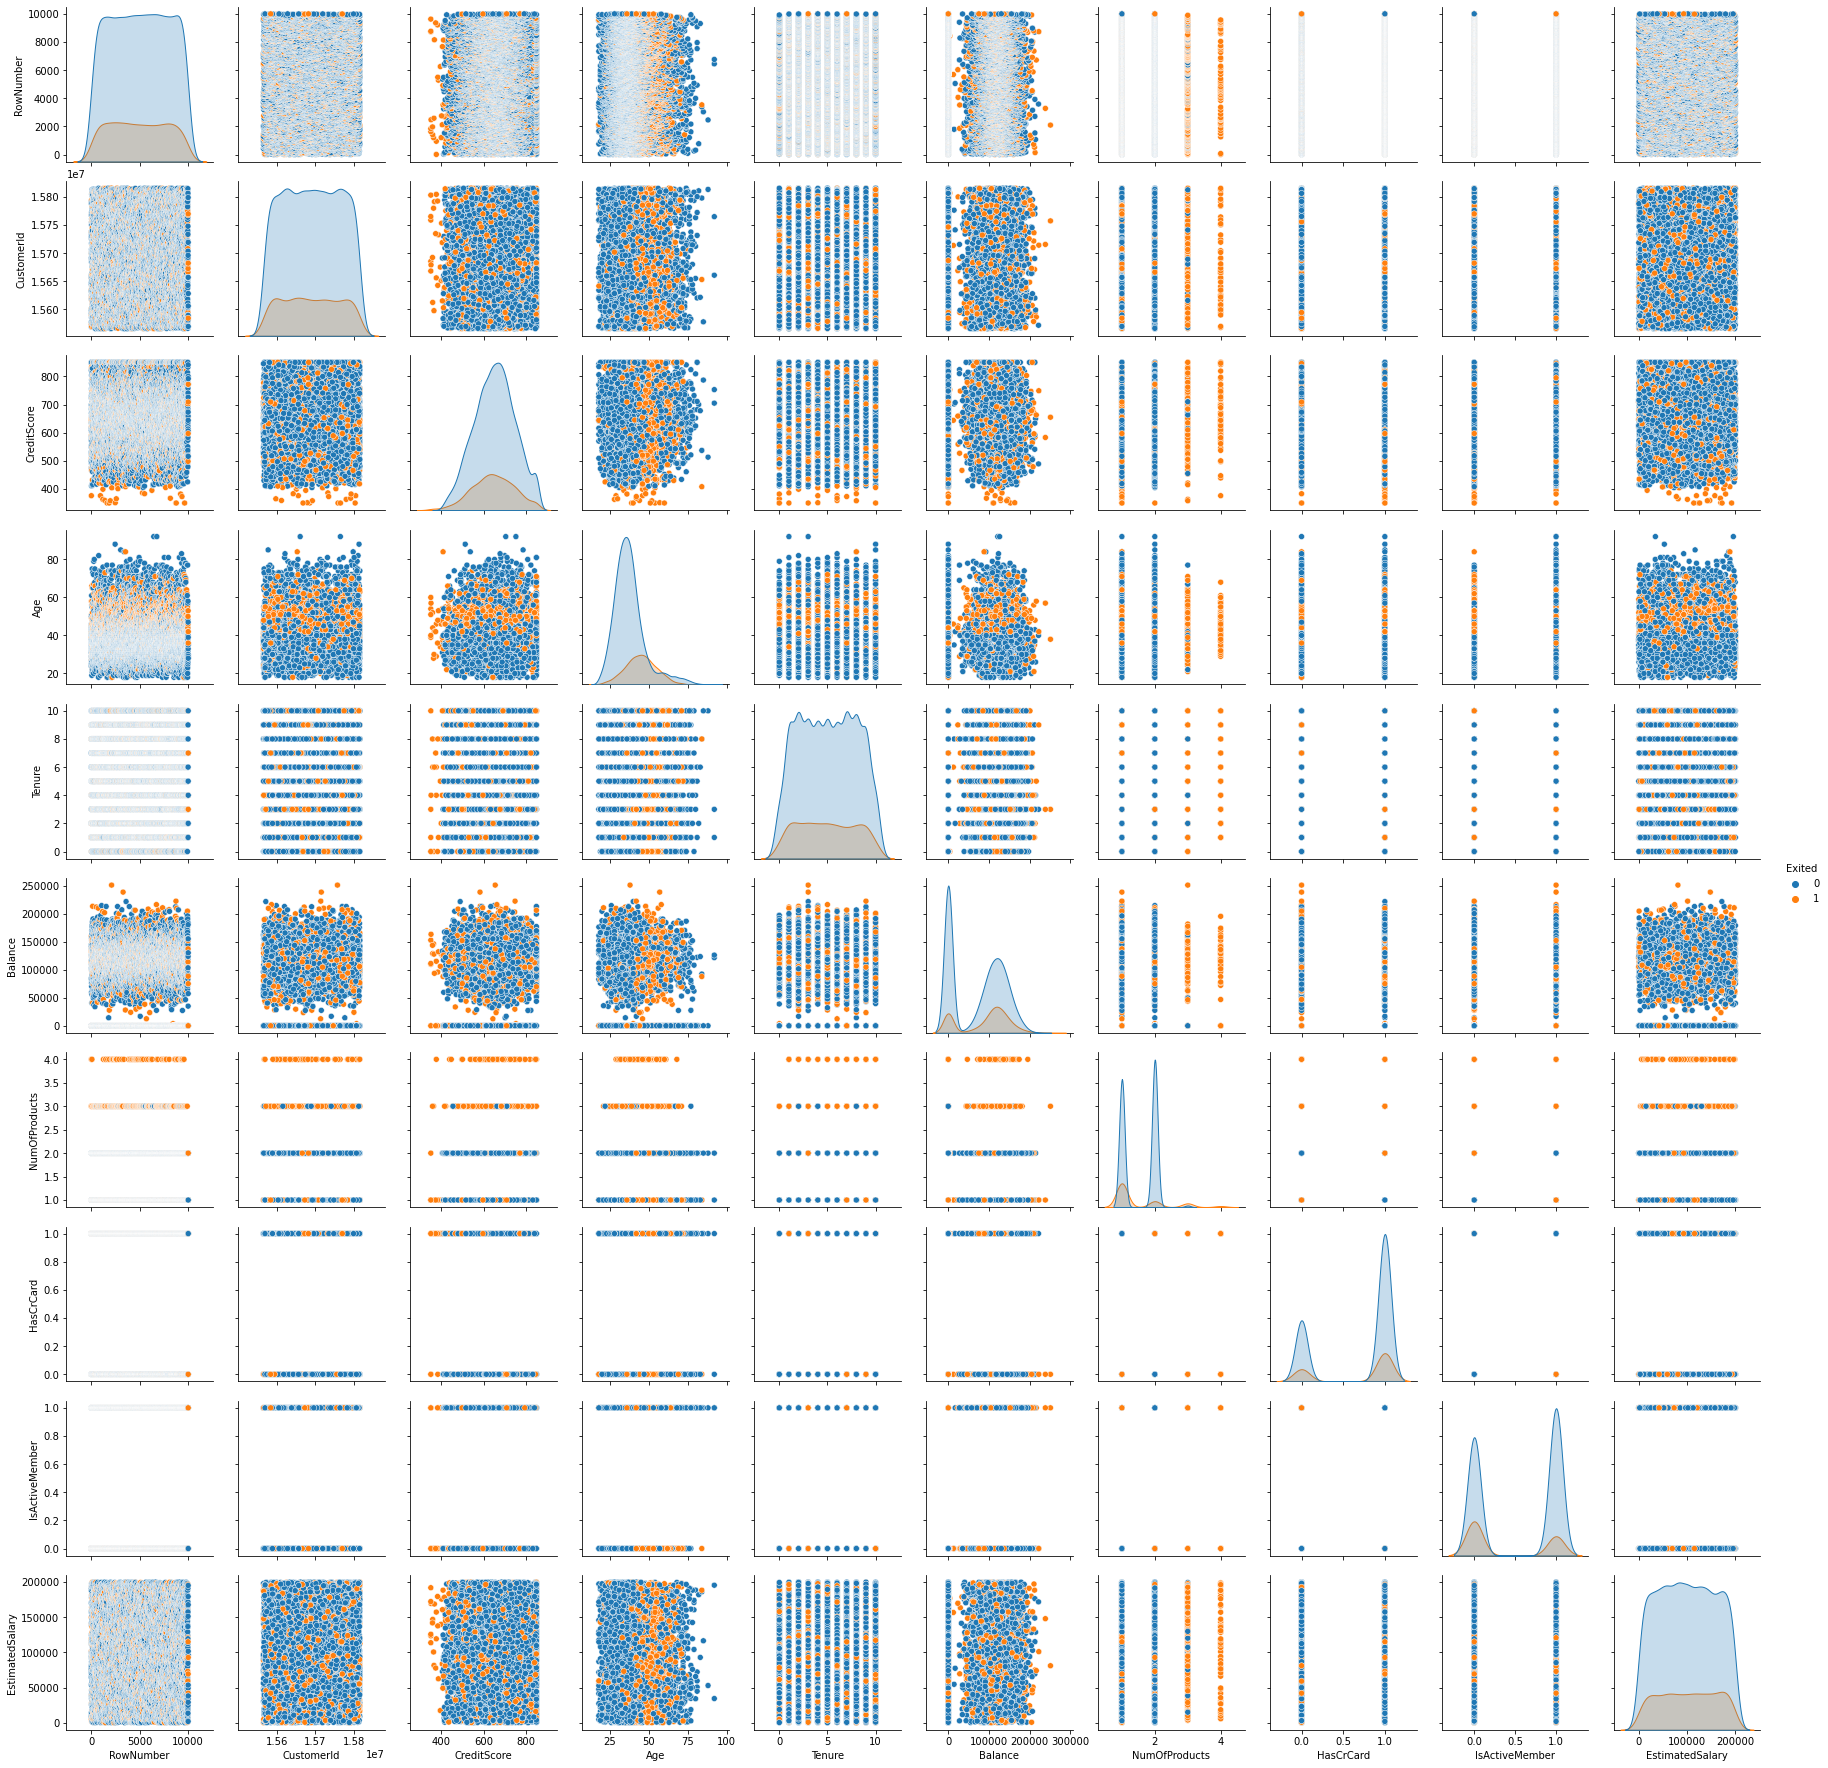

In [7]:
sns.pairplot(df, hue = 'Exited');

In [8]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

- Check for missing values

In [9]:
df.isnull().sum()
# there is no missing value

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.duplicated().sum()
#no duplicated data

0

- Drop the features that not suitable for modelling: Drop 'CustomerId','RowNumber','Surname'columns because are not have an effect on the model

In [11]:
droped_data = [ 'CustomerId','RowNumber','Surname']
df.drop(droped_data , axis=1 , inplace=True)

In [12]:
df.shape

(10000, 11)

In [13]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

- Implement basic visualization steps 

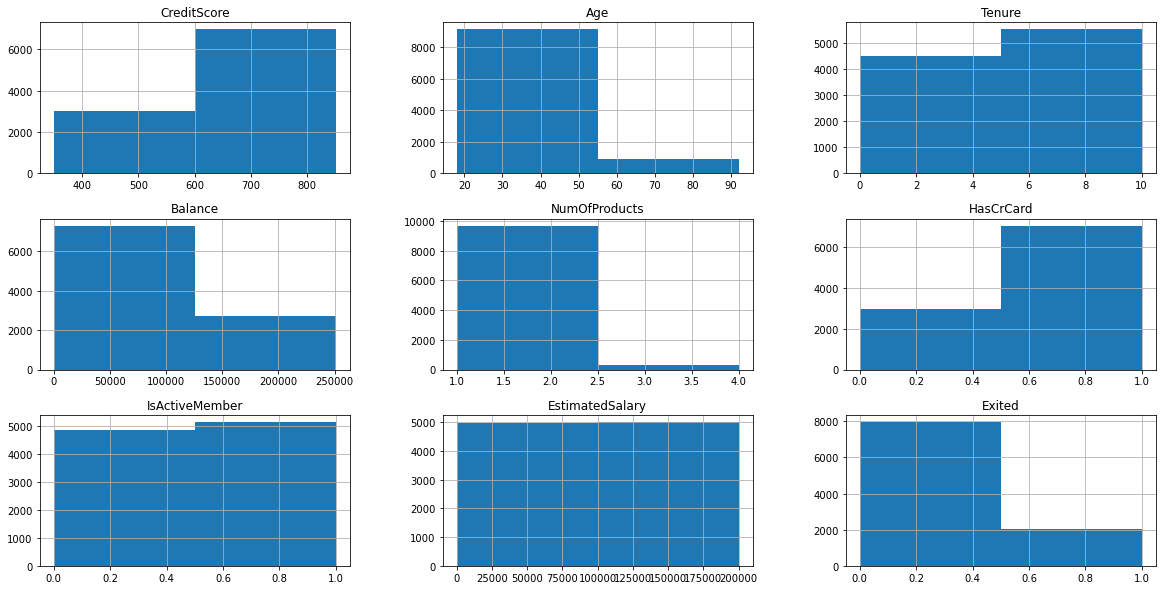

In [14]:
df.hist(bins=2, figsize=[20,10]);

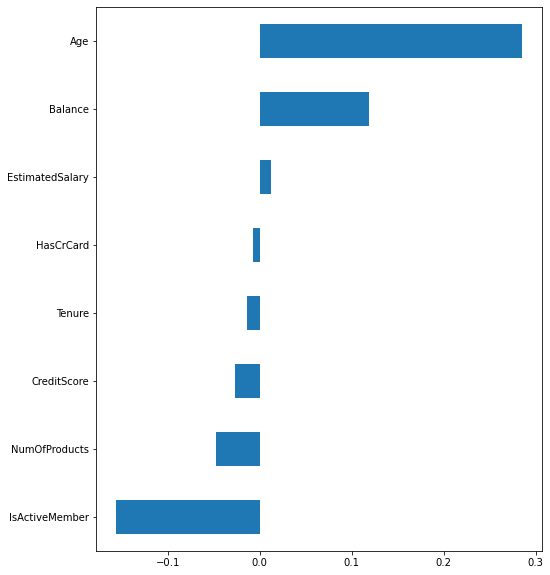

In [15]:
plt.figure(figsize=(8, 10))
(df.corr()["Exited"].sort_values().drop("Exited").plot(kind="barh"))
plt.show()

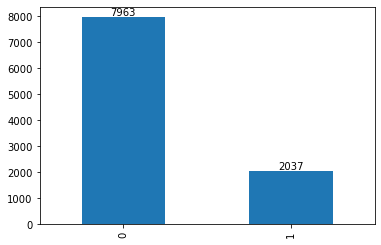

In [16]:
ax = df.Exited.value_counts().plot(kind = 'bar')
ax.bar_label(ax.containers[0]);

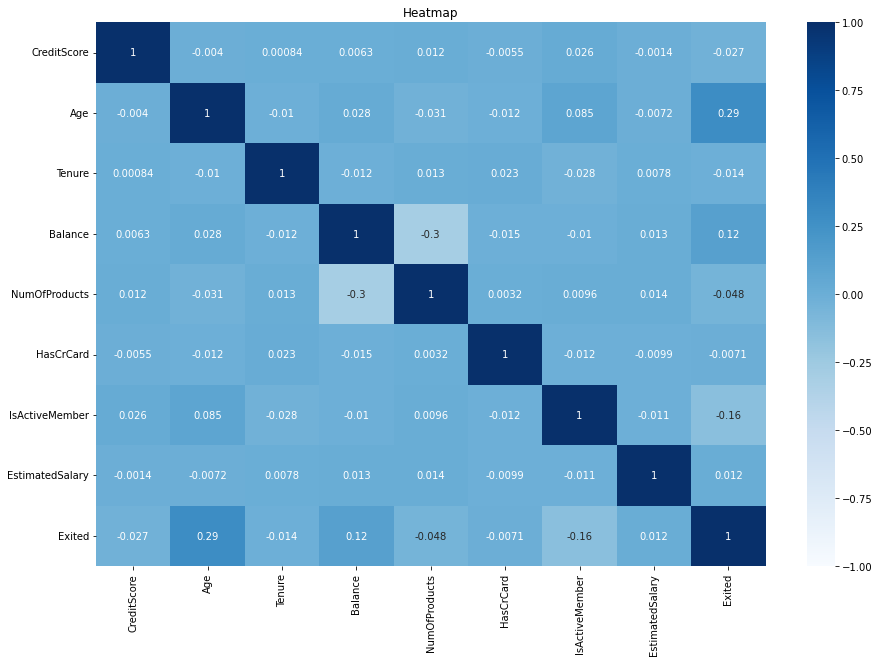

In [17]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True,vmin=-1, vmax=1, cmap='Blues')
plt.title('Heatmap')
plt.show()

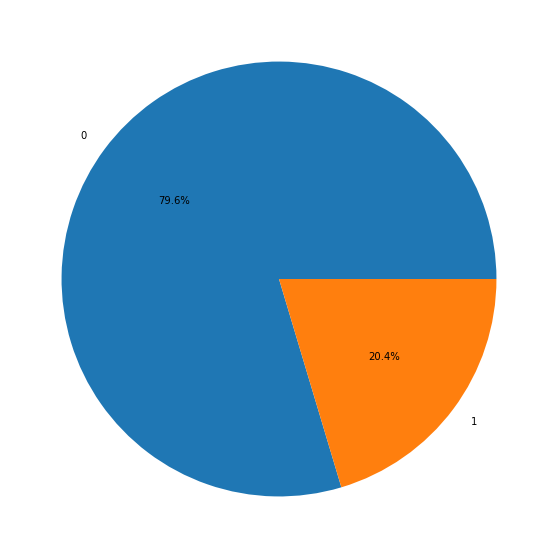

In [18]:
df["Exited"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(10, 10));
plt.ylabel("");

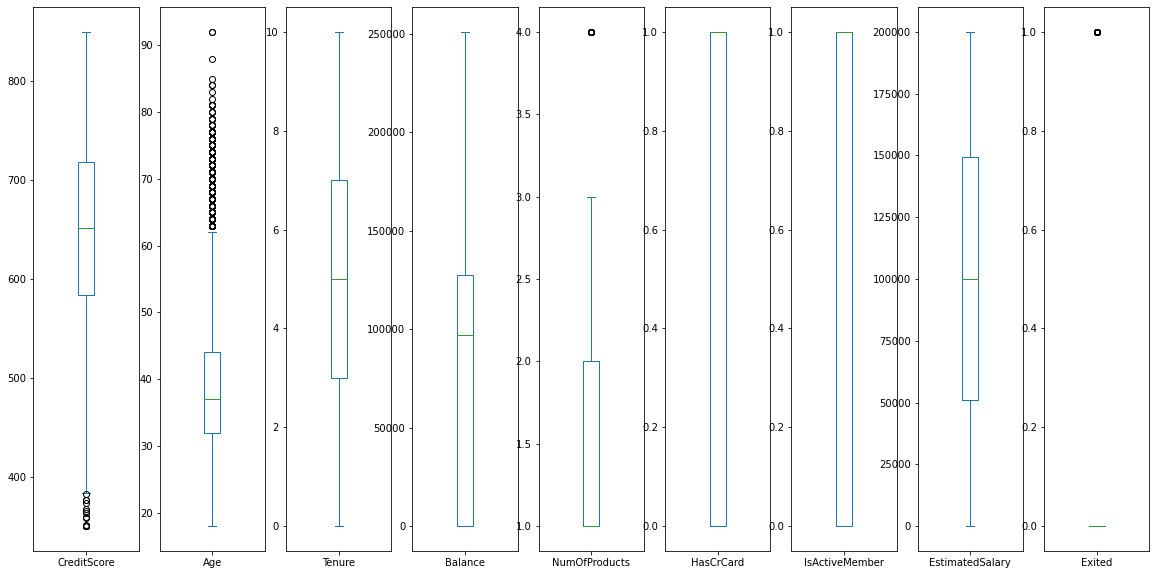

In [19]:
df.plot(kind='box',subplots=True, figsize=(20,10));

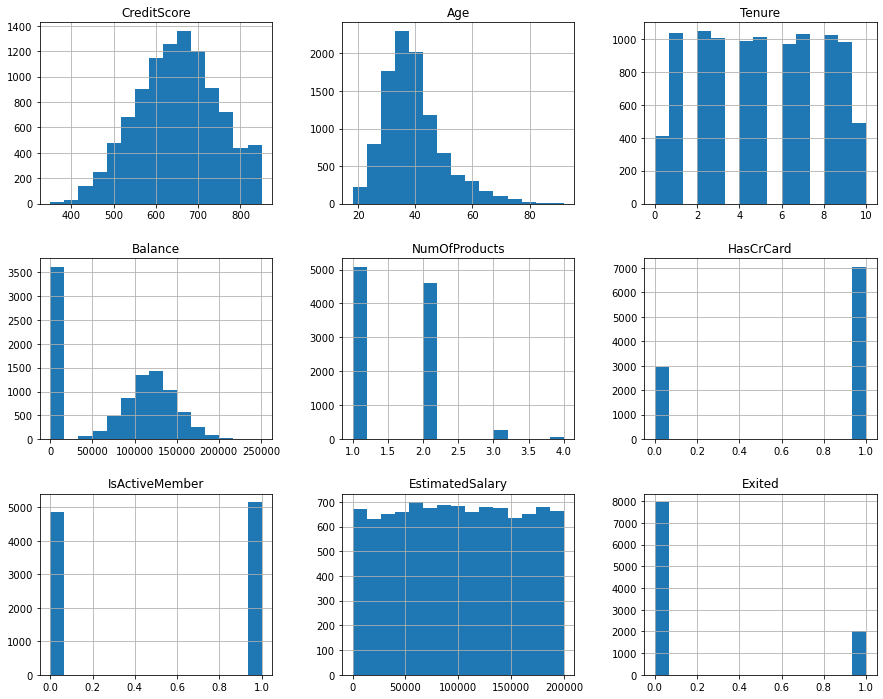

In [20]:
df.hist(figsize=(15,12),bins = 15)
plt.show()

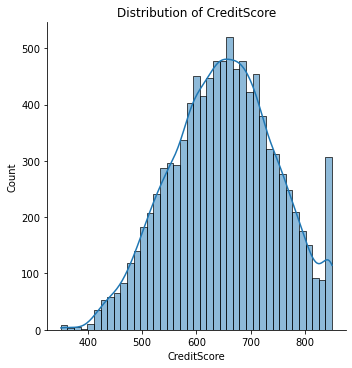

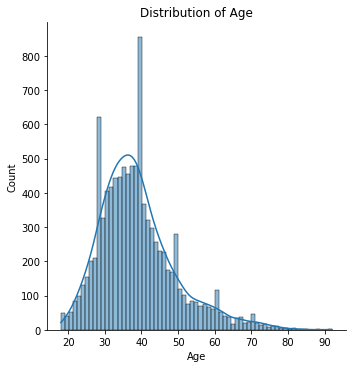

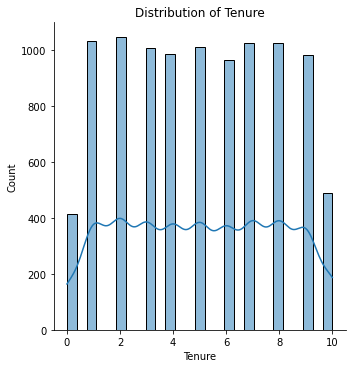

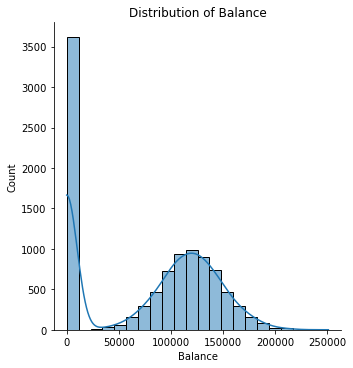

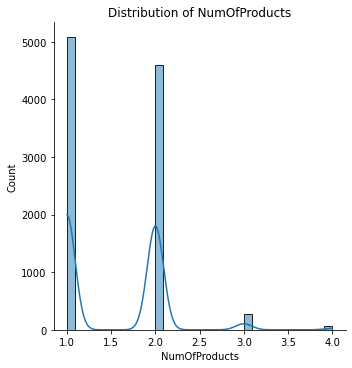

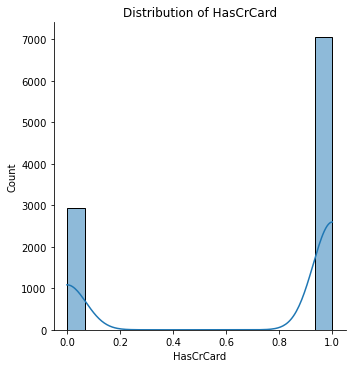

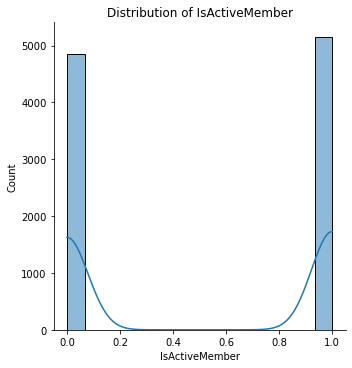

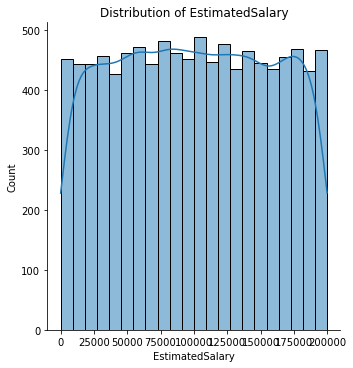

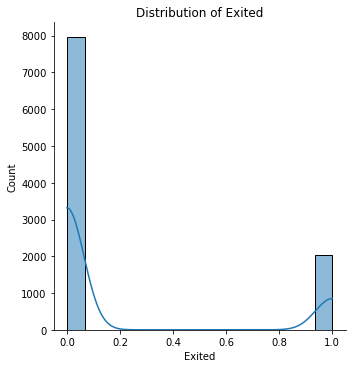

In [21]:
numeric_columns = df.select_dtypes(include=['number']).columns
for column in numeric_columns:
    sns.displot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

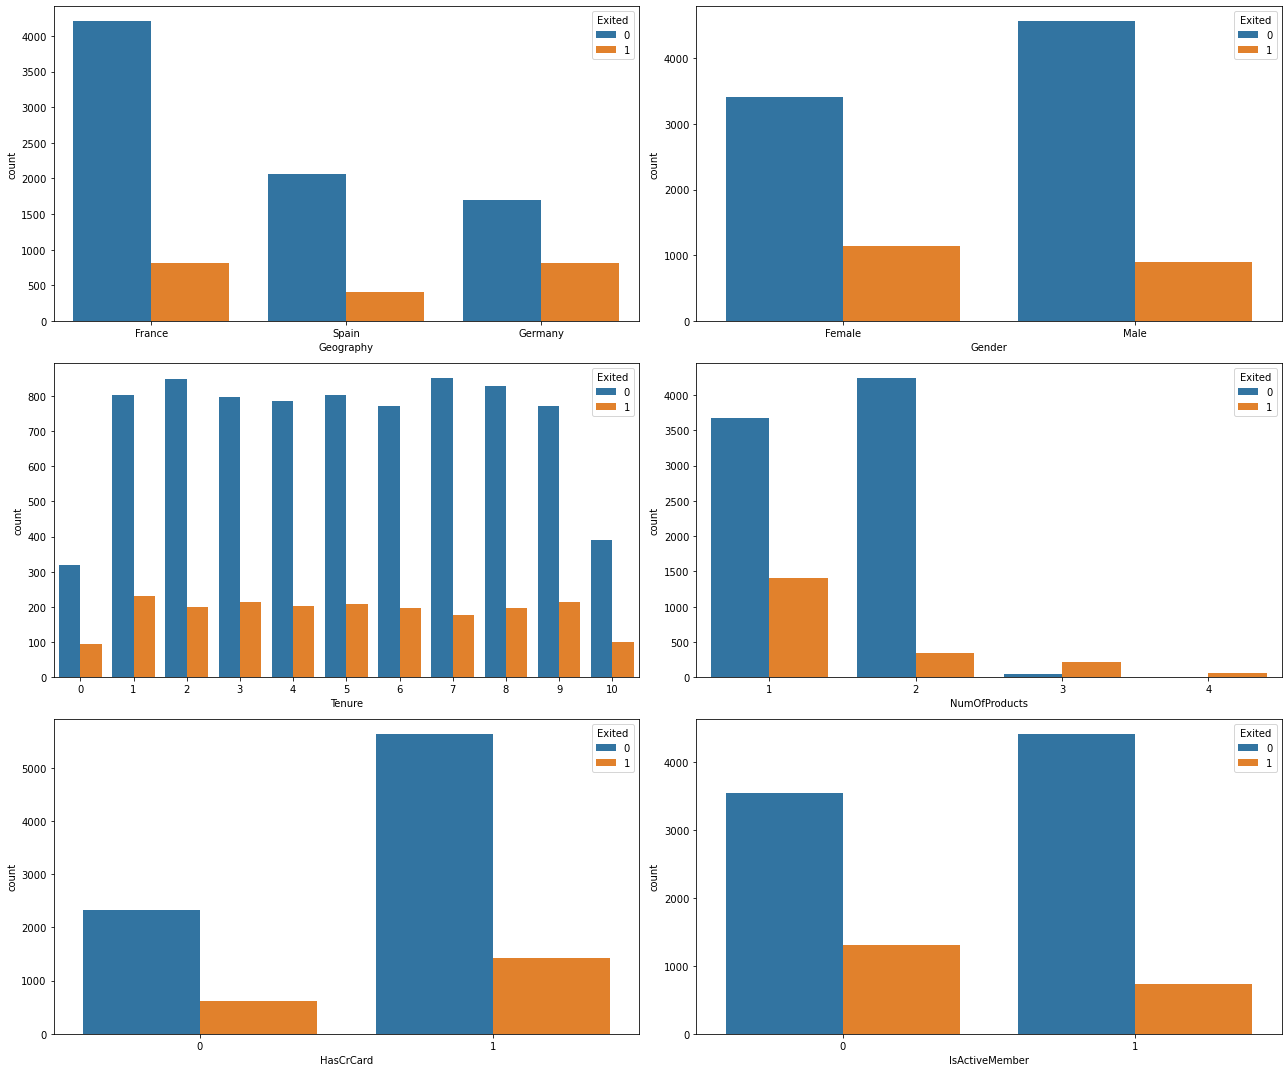

In [22]:
fig, ax = plt.subplots(3, 2, figsize=(18, 15))

sns.countplot(data=df, x='Geography', hue='Exited', ax=ax[0][0])
sns.countplot(data=df, x='Gender', hue='Exited', ax=ax[0][1])
sns.countplot(data=df, x='Tenure', hue='Exited', ax=ax[1][0])
sns.countplot(data=df, x='NumOfProducts', hue='Exited', ax=ax[1][1])
sns.countplot(data=df, x='HasCrCard', hue='Exited', ax=ax[2][0])
sns.countplot(data=df, x='IsActiveMember', hue='Exited', ax=ax[2][1])

plt.tight_layout()
plt.show()

In [23]:
def box_m(model):
    sns.boxplot(data = df, x= "Exited", y = model)

interactive_df = df.select_dtypes(include = 'number').columns[
    df.select_dtypes(include = 'number').columns != 'Exited']

interact(box_m, model=interactive_df);

interactive(children=(Dropdown(description='model', options=('CreditScore', 'Age', 'Tenure', 'Balance', 'NumOf…

- Mapping and One-Hot Encoder

In [24]:
object_columns = df.select_dtypes(include=['object']).columns
for i in object_columns:
    print(f"{i:<30}:",df[i].nunique())

Geography                     : 3
Gender                        : 2


In [25]:
df["Gender"] = df["Gender"].map({'Female' : 0 , 'Male' : 1})
df

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France       0   42       2       0.00              1   
1             608     Spain       0   41       1   83807.86              1   
2             502    France       0   42       8  159660.80              3   
3             699    France       0   39       1       0.00              2   
4             850     Spain       0   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France       1   39       5       0.00              2   
9996          516    France       1   35      10   57369.61              1   
9997          709    France       0   36       7       0.00              1   
9998          772   Germany       1   42       3   75075.31              2   
9999          792    France       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

In [26]:
scaler = MinMaxScaler()

In [27]:
cols_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [28]:
column_trans = make_column_transformer((
               OneHotEncoder(handle_unknown='ignore',
                              sparse=False),
                              ["Geography"]),
                              (scaler, cols_scale),
                              remainder = 'passthrough',
                              verbose=False)

In [29]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['Geography']),
                                ('minmaxscaler', MinMaxScaler(),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'EstimatedSalary'])])

In [30]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# Preprocessing of Data
- Train | Test Split, Scalling

In [31]:
X = df.drop('Exited', axis = 1)
y = df.Exited

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y, 
                                                    test_size=0.1, 
                                                    random_state=42)

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  stratify=y_train, 
                                                  test_size=0.05, 
                                                  random_state=42)

In [34]:
X_train = column_trans.fit_transform (X_train)
X_test = column_trans.transform (X_test)
X_val = column_trans.transform (X_val)

In [35]:
X_train.shape

(8550, 12)

In [36]:
X_test.shape

(1000, 12)

In [37]:
X_val.shape

(450, 12)

# Modelling & Model Performance

In [38]:
def seedsetter():
    SEED = 42
    import os
    import random
    os.environ["TF_DETERMINISTIC_OPS"] = "1"
    tf.keras.utils.set_random_seed(SEED)
    os.environ['PYTHONHASHSEED']=str(SEED)
    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)

In [39]:
def roc_auc_plot(y_train, pred_train, y_test, pred_test):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, pred_train)
    fpr_keras_test, tpr_keras_test, thresholds_keras_test = roc_curve(y_test, pred_test)


    auc_keras = auc(fpr_keras, tpr_keras)
    auc_keras_test = auc(fpr_keras_test, tpr_keras_test)


    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='train (area = {:.3f})'.format(auc_keras))
    plt.plot(fpr_keras_test, tpr_keras_test, label='val (area = {:.3f})'.format(auc_keras_test))

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

## without class_weigth

### Create The Model

In [40]:
model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [41]:
model.fit(
    x=X_train, y=y_train, validation_data=(X_val , y_val), batch_size=64, epochs=500, verbose=1
)

Epoch 1/500
134/134 [==============================] - 1s 2ms/step - loss: 0.5421 - recall: 0.0465 - val_loss: 0.4817 - val_recall: 0.0000e+00
Epoch 2/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4672 - recall: 0.0000e+00 - val_loss: 0.4574 - val_recall: 0.0000e+00
Epoch 3/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4452 - recall: 0.0534 - val_loss: 0.4366 - val_recall: 0.0326
Epoch 4/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4283 - recall: 0.1597 - val_loss: 0.4227 - val_recall: 0.1413
Epoch 5/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4158 - recall: 0.2349 - val_loss: 0.4096 - val_recall: 0.1957
Epoch 6/500
134/134 [==============================] - 0s 967us/step - loss: 0.4066 - recall: 0.2791 - val_loss: 0.4035 - val_recall: 0.2717
Epoch 7/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3978 - recall: 0.3061 - val_loss: 0.3947 - val_recall: 0.3804
Epoch 8/500
1

134/134 [==============================] - 0s 1ms/step - loss: 0.3268 - recall: 0.4825 - val_loss: 0.3459 - val_recall: 0.4239
Epoch 60/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3288 - recall: 0.4888 - val_loss: 0.3447 - val_recall: 0.4022
Epoch 61/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3283 - recall: 0.4888 - val_loss: 0.3487 - val_recall: 0.4457
Epoch 62/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3268 - recall: 0.4808 - val_loss: 0.3388 - val_recall: 0.4565
Epoch 63/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3270 - recall: 0.4750 - val_loss: 0.3449 - val_recall: 0.4239
Epoch 64/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3267 - recall: 0.4848 - val_loss: 0.3445 - val_recall: 0.5000
Epoch 65/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3275 - recall: 0.4911 - val_loss: 0.3368 - val_recall: 0.4891
Epoch 66/500
134/134 [===========

134/134 [==============================] - 0s 1ms/step - loss: 0.3171 - recall: 0.5083 - val_loss: 0.3382 - val_recall: 0.5109
Epoch 118/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3164 - recall: 0.5095 - val_loss: 0.3456 - val_recall: 0.5109
Epoch 119/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3162 - recall: 0.5089 - val_loss: 0.3371 - val_recall: 0.4239
Epoch 120/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3154 - recall: 0.5078 - val_loss: 0.3456 - val_recall: 0.4348
Epoch 121/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3171 - recall: 0.5106 - val_loss: 0.3425 - val_recall: 0.4022
Epoch 122/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3158 - recall: 0.5101 - val_loss: 0.3464 - val_recall: 0.4130
Epoch 123/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3164 - recall: 0.4997 - val_loss: 0.3435 - val_recall: 0.4130
Epoch 124/500
134/134 [====

134/134 [==============================] - 0s 1ms/step - loss: 0.3096 - recall: 0.5112 - val_loss: 0.3455 - val_recall: 0.4348
Epoch 176/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3087 - recall: 0.5106 - val_loss: 0.3413 - val_recall: 0.4674
Epoch 177/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3103 - recall: 0.5164 - val_loss: 0.3412 - val_recall: 0.5326
Epoch 178/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3094 - recall: 0.5221 - val_loss: 0.3387 - val_recall: 0.4565
Epoch 179/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3100 - recall: 0.5123 - val_loss: 0.3364 - val_recall: 0.5000
Epoch 180/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3090 - recall: 0.5158 - val_loss: 0.3388 - val_recall: 0.4674
Epoch 181/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3088 - recall: 0.5244 - val_loss: 0.3605 - val_recall: 0.3696
Epoch 182/500
134/134 [====

134/134 [==============================] - 0s 1ms/step - loss: 0.3061 - recall: 0.5250 - val_loss: 0.3473 - val_recall: 0.4565
Epoch 234/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3039 - recall: 0.5210 - val_loss: 0.3469 - val_recall: 0.5000
Epoch 235/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3046 - recall: 0.5296 - val_loss: 0.3406 - val_recall: 0.4891
Epoch 236/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3041 - recall: 0.5250 - val_loss: 0.3535 - val_recall: 0.4239
Epoch 237/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3035 - recall: 0.5290 - val_loss: 0.3422 - val_recall: 0.4674
Epoch 238/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3035 - recall: 0.5233 - val_loss: 0.3540 - val_recall: 0.4457
Epoch 239/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3039 - recall: 0.5284 - val_loss: 0.3564 - val_recall: 0.4022
Epoch 240/500
134/134 [====

134/134 [==============================] - 0s 1ms/step - loss: 0.3016 - recall: 0.5313 - val_loss: 0.3576 - val_recall: 0.4565
Epoch 292/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3010 - recall: 0.5319 - val_loss: 0.3641 - val_recall: 0.4130
Epoch 293/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3017 - recall: 0.5215 - val_loss: 0.3601 - val_recall: 0.4130
Epoch 294/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3014 - recall: 0.5348 - val_loss: 0.3569 - val_recall: 0.4565
Epoch 295/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3003 - recall: 0.5313 - val_loss: 0.3548 - val_recall: 0.4457
Epoch 296/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3011 - recall: 0.5325 - val_loss: 0.3575 - val_recall: 0.4348
Epoch 297/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3000 - recall: 0.5370 - val_loss: 0.3667 - val_recall: 0.4130
Epoch 298/500
134/134 [====

134/134 [==============================] - 0s 1ms/step - loss: 0.2982 - recall: 0.5393 - val_loss: 0.3524 - val_recall: 0.4565
Epoch 350/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3001 - recall: 0.5480 - val_loss: 0.3657 - val_recall: 0.4348
Epoch 351/500
134/134 [==============================] - 0s 1ms/step - loss: 0.2981 - recall: 0.5445 - val_loss: 0.3614 - val_recall: 0.4565
Epoch 352/500
134/134 [==============================] - 0s 1ms/step - loss: 0.2983 - recall: 0.5434 - val_loss: 0.3600 - val_recall: 0.4674
Epoch 353/500
134/134 [==============================] - 0s 1ms/step - loss: 0.2979 - recall: 0.5388 - val_loss: 0.3574 - val_recall: 0.4783
Epoch 354/500
134/134 [==============================] - 0s 1ms/step - loss: 0.2974 - recall: 0.5325 - val_loss: 0.3535 - val_recall: 0.4783
Epoch 355/500
134/134 [==============================] - 0s 1ms/step - loss: 0.2982 - recall: 0.5428 - val_loss: 0.3586 - val_recall: 0.4457
Epoch 356/500
134/134 [====

134/134 [==============================] - 0s 1ms/step - loss: 0.2983 - recall: 0.5462 - val_loss: 0.3687 - val_recall: 0.4457
Epoch 408/500
134/134 [==============================] - 0s 1ms/step - loss: 0.2974 - recall: 0.5393 - val_loss: 0.3607 - val_recall: 0.4891
Epoch 409/500
134/134 [==============================] - 0s 1ms/step - loss: 0.2971 - recall: 0.5526 - val_loss: 0.3672 - val_recall: 0.4239
Epoch 410/500
134/134 [==============================] - 0s 1ms/step - loss: 0.2986 - recall: 0.5376 - val_loss: 0.3687 - val_recall: 0.4348
Epoch 411/500
134/134 [==============================] - 0s 1ms/step - loss: 0.2970 - recall: 0.5416 - val_loss: 0.3656 - val_recall: 0.4674
Epoch 412/500
134/134 [==============================] - 0s 1ms/step - loss: 0.2951 - recall: 0.5462 - val_loss: 0.3668 - val_recall: 0.5109
Epoch 413/500
134/134 [==============================] - 0s 1ms/step - loss: 0.2960 - recall: 0.5468 - val_loss: 0.3655 - val_recall: 0.4674
Epoch 414/500
134/134 [====

134/134 [==============================] - 0s 1ms/step - loss: 0.2968 - recall: 0.5474 - val_loss: 0.3688 - val_recall: 0.4674
Epoch 466/500
134/134 [==============================] - 0s 1ms/step - loss: 0.2935 - recall: 0.5485 - val_loss: 0.3689 - val_recall: 0.5109
Epoch 467/500
134/134 [==============================] - 0s 1ms/step - loss: 0.2957 - recall: 0.5480 - val_loss: 0.3802 - val_recall: 0.4130
Epoch 468/500
134/134 [==============================] - 0s 1ms/step - loss: 0.2941 - recall: 0.5480 - val_loss: 0.3719 - val_recall: 0.5761
Epoch 469/500
134/134 [==============================] - 0s 1ms/step - loss: 0.2948 - recall: 0.5537 - val_loss: 0.3668 - val_recall: 0.5000
Epoch 470/500
134/134 [==============================] - 0s 1ms/step - loss: 0.2940 - recall: 0.5520 - val_loss: 0.3729 - val_recall: 0.4348
Epoch 471/500
134/134 [==============================] - 0s 1ms/step - loss: 0.2946 - recall: 0.5514 - val_loss: 0.3695 - val_recall: 0.4565
Epoch 472/500
134/134 [====

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                260       
                                                                 
 dense_1 (Dense)             (None, 16)                336       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 741
Trainable params: 741
Non-trainable params: 0
_________________________________________________________________


In [43]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss    recall  val_loss  val_recall
0  0.542080  0.046525  0.481720    0.000000
1  0.467224  0.000000  0.457407    0.000000
2  0.445163  0.053418  0.436621    0.032609
3  0.428343  0.159678  0.422682    0.141304
4  0.415774  0.234922  0.409570    0.195652

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

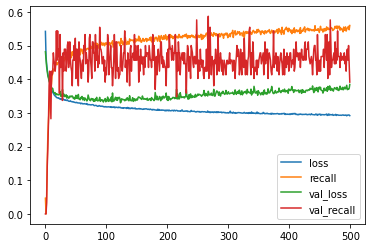

In [44]:
loss_df.plot()
plt.show()

In [45]:
variable = model.evaluate(X_test, y_test, verbose=0)

In [46]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.3788796663284302
recall:  0.37254902720451355


In [47]:
print("Train")
y_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print("-------")
print("Test")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#overfitting

Train
268/268 [==============================] - 0s 606us/step
[[6713   96]
 [ 945  796]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      6809
           1       0.89      0.46      0.60      1741

    accuracy                           0.88      8550
   macro avg       0.88      0.72      0.77      8550
weighted avg       0.88      0.88      0.86      8550

-------
Test
32/32 [==============================] - 0s 1ms/step
[[777  19]
 [128  76]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       796
           1       0.80      0.37      0.51       204

    accuracy                           0.85      1000
   macro avg       0.83      0.67      0.71      1000
weighted avg       0.85      0.85      0.83      1000



In [48]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve, auc


In [49]:
roc_auc_score(y_test, y_pred)

0.6743398364370874

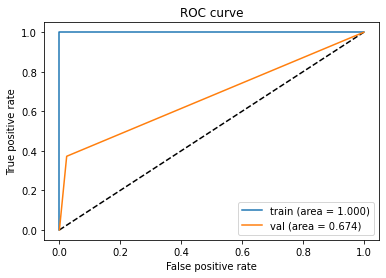

In [50]:
roc_auc_plot(y_train, y_train, y_test, y_pred)

Text(69.0, 0.5, 'Truth')

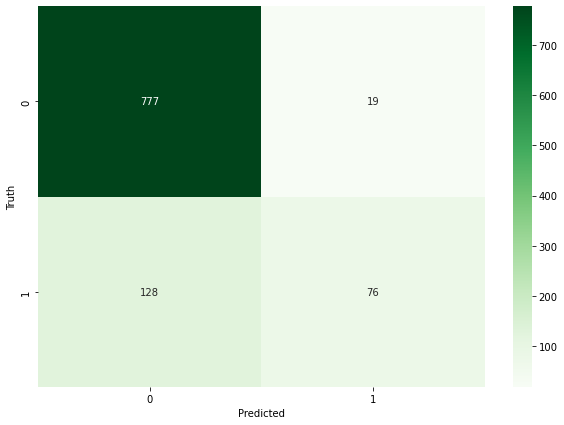

In [51]:
cm = tf.math. confusion_matrix(labels= y_test, predictions= y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot= True, fmt= 'd', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [52]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}

In [53]:
class_weights

{0: 0.6278454986047878, 1: 2.4554853532452614}

In [54]:
model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [55]:
model.fit(x = X_train, y = y_train, validation_data=(X_val,y_val), batch_size = 64, epochs = 500, class_weight=class_weights)

Epoch 1/500
134/134 [==============================] - 1s 2ms/step - loss: 0.6632 - recall: 0.7743 - val_loss: 0.6250 - val_recall: 0.6739
Epoch 2/500
134/134 [==============================] - 0s 944us/step - loss: 0.6121 - recall: 0.6663 - val_loss: 0.5871 - val_recall: 0.7391
Epoch 3/500
134/134 [==============================] - 0s 1ms/step - loss: 0.5868 - recall: 0.7007 - val_loss: 0.5450 - val_recall: 0.7391
Epoch 4/500
134/134 [==============================] - 0s 1ms/step - loss: 0.5704 - recall: 0.7007 - val_loss: 0.5176 - val_recall: 0.6957
Epoch 5/500
134/134 [==============================] - 0s 1ms/step - loss: 0.5522 - recall: 0.7099 - val_loss: 0.5295 - val_recall: 0.7609
Epoch 6/500
134/134 [==============================] - 0s 1ms/step - loss: 0.5342 - recall: 0.7272 - val_loss: 0.4905 - val_recall: 0.7500
Epoch 7/500
134/134 [==============================] - 0s 1ms/step - loss: 0.5196 - recall: 0.7375 - val_loss: 0.4916 - val_recall: 0.7826
Epoch 8/500
134/134 [====

134/134 [==============================] - 0s 1ms/step - loss: 0.4461 - recall: 0.7754 - val_loss: 0.4077 - val_recall: 0.7065
Epoch 60/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4446 - recall: 0.7754 - val_loss: 0.4118 - val_recall: 0.7174
Epoch 61/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4452 - recall: 0.7743 - val_loss: 0.4160 - val_recall: 0.7391
Epoch 62/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4440 - recall: 0.7789 - val_loss: 0.4304 - val_recall: 0.7391
Epoch 63/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4449 - recall: 0.7748 - val_loss: 0.4630 - val_recall: 0.7717
Epoch 64/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4439 - recall: 0.7777 - val_loss: 0.4214 - val_recall: 0.7391
Epoch 65/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4438 - recall: 0.7829 - val_loss: 0.4032 - val_recall: 0.7283
Epoch 66/500
134/134 [===========

134/134 [==============================] - 0s 1ms/step - loss: 0.4348 - recall: 0.7886 - val_loss: 0.4350 - val_recall: 0.7391
Epoch 118/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4355 - recall: 0.7783 - val_loss: 0.4178 - val_recall: 0.7174
Epoch 119/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4342 - recall: 0.7829 - val_loss: 0.4338 - val_recall: 0.7391
Epoch 120/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4365 - recall: 0.7829 - val_loss: 0.4155 - val_recall: 0.7283
Epoch 121/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4333 - recall: 0.7800 - val_loss: 0.3975 - val_recall: 0.7065
Epoch 122/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4348 - recall: 0.7783 - val_loss: 0.4469 - val_recall: 0.7609
Epoch 123/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4333 - recall: 0.7800 - val_loss: 0.4093 - val_recall: 0.6957
Epoch 124/500
134/134 [====

134/134 [==============================] - 0s 2ms/step - loss: 0.4262 - recall: 0.7812 - val_loss: 0.4075 - val_recall: 0.6957
Epoch 176/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4269 - recall: 0.7766 - val_loss: 0.4455 - val_recall: 0.7174
Epoch 177/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4253 - recall: 0.7840 - val_loss: 0.4210 - val_recall: 0.6957
Epoch 178/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4252 - recall: 0.7909 - val_loss: 0.4510 - val_recall: 0.7283
Epoch 179/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4259 - recall: 0.7783 - val_loss: 0.4282 - val_recall: 0.7065
Epoch 180/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4249 - recall: 0.7869 - val_loss: 0.4121 - val_recall: 0.6957
Epoch 181/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4244 - recall: 0.7858 - val_loss: 0.3836 - val_recall: 0.6413
Epoch 182/500
134/134 [====

134/134 [==============================] - 0s 1ms/step - loss: 0.4208 - recall: 0.7840 - val_loss: 0.4274 - val_recall: 0.7174
Epoch 234/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4191 - recall: 0.7875 - val_loss: 0.4350 - val_recall: 0.7065
Epoch 235/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4162 - recall: 0.7846 - val_loss: 0.4385 - val_recall: 0.6957
Epoch 236/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4179 - recall: 0.7898 - val_loss: 0.4121 - val_recall: 0.6957
Epoch 237/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4185 - recall: 0.7909 - val_loss: 0.4683 - val_recall: 0.7609
Epoch 238/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4180 - recall: 0.7932 - val_loss: 0.4164 - val_recall: 0.6739
Epoch 239/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4184 - recall: 0.7904 - val_loss: 0.4272 - val_recall: 0.7174
Epoch 240/500
134/134 [====

134/134 [==============================] - 0s 1ms/step - loss: 0.4145 - recall: 0.7892 - val_loss: 0.4068 - val_recall: 0.6957
Epoch 292/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4137 - recall: 0.7835 - val_loss: 0.4536 - val_recall: 0.7391
Epoch 293/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4142 - recall: 0.7949 - val_loss: 0.4081 - val_recall: 0.7065
Epoch 294/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4132 - recall: 0.7875 - val_loss: 0.4097 - val_recall: 0.6848
Epoch 295/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4124 - recall: 0.7915 - val_loss: 0.4174 - val_recall: 0.6957
Epoch 296/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4134 - recall: 0.7926 - val_loss: 0.4218 - val_recall: 0.7065
Epoch 297/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4144 - recall: 0.7858 - val_loss: 0.4065 - val_recall: 0.6957
Epoch 298/500
134/134 [====

134/134 [==============================] - 0s 1ms/step - loss: 0.4083 - recall: 0.7955 - val_loss: 0.4125 - val_recall: 0.7174
Epoch 350/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4098 - recall: 0.7932 - val_loss: 0.4213 - val_recall: 0.7174
Epoch 351/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4070 - recall: 0.7990 - val_loss: 0.4487 - val_recall: 0.7283
Epoch 352/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4081 - recall: 0.7944 - val_loss: 0.4315 - val_recall: 0.7065
Epoch 353/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4096 - recall: 0.7926 - val_loss: 0.4328 - val_recall: 0.7065
Epoch 354/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4070 - recall: 0.7955 - val_loss: 0.4246 - val_recall: 0.7065
Epoch 355/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4075 - recall: 0.7967 - val_loss: 0.4040 - val_recall: 0.6957
Epoch 356/500
134/134 [====

134/134 [==============================] - 0s 1ms/step - loss: 0.4040 - recall: 0.7949 - val_loss: 0.4701 - val_recall: 0.7283
Epoch 408/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4033 - recall: 0.8053 - val_loss: 0.4029 - val_recall: 0.6957
Epoch 409/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4045 - recall: 0.7978 - val_loss: 0.4290 - val_recall: 0.7174
Epoch 410/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4028 - recall: 0.8053 - val_loss: 0.4186 - val_recall: 0.7065
Epoch 411/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4051 - recall: 0.8013 - val_loss: 0.4332 - val_recall: 0.7174
Epoch 412/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4034 - recall: 0.8047 - val_loss: 0.4278 - val_recall: 0.7174
Epoch 413/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4030 - recall: 0.8041 - val_loss: 0.4289 - val_recall: 0.7065
Epoch 414/500
134/134 [====

134/134 [==============================] - 0s 1ms/step - loss: 0.4027 - recall: 0.8030 - val_loss: 0.4302 - val_recall: 0.7065
Epoch 466/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4023 - recall: 0.8047 - val_loss: 0.4303 - val_recall: 0.7065
Epoch 467/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4009 - recall: 0.8087 - val_loss: 0.4224 - val_recall: 0.7065
Epoch 468/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4006 - recall: 0.8047 - val_loss: 0.4291 - val_recall: 0.7065
Epoch 469/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4010 - recall: 0.8047 - val_loss: 0.4159 - val_recall: 0.7065
Epoch 470/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3996 - recall: 0.8001 - val_loss: 0.4289 - val_recall: 0.7174
Epoch 471/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4024 - recall: 0.8001 - val_loss: 0.4290 - val_recall: 0.6957
Epoch 472/500
134/134 [====

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                260       
                                                                 
 dense_5 (Dense)             (None, 16)                336       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 741
Trainable params: 741
Non-trainable params: 0
_________________________________________________________________


In [57]:
loss_weight = pd.DataFrame(model.history.history)
loss_weight.head()

loss    recall  val_loss  val_recall
0  0.663237  0.774268  0.625033    0.673913
1  0.612111  0.666284  0.587067    0.739130
2  0.586773  0.700747  0.545031    0.739130
3  0.570446  0.700747  0.517608    0.695652
4  0.552203  0.709937  0.529531    0.760870

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

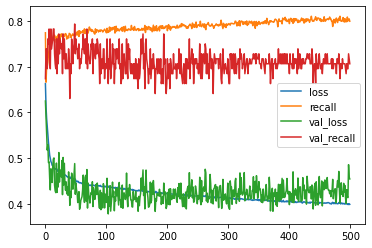

In [58]:
loss_weight.plot()
plt.show()

In [59]:
y_precdit = model.evaluate(X_test, y_test, verbose=0)

In [60]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.5047416687011719
recall:  0.7745097875595093


In [61]:
print("Train")
y_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print("-------")
print("Test")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#overfitting

Train
268/268 [==============================] - 0s 659us/step
[[5318 1491]
 [ 264 1477]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      6809
           1       0.50      0.85      0.63      1741

    accuracy                           0.79      8550
   macro avg       0.73      0.81      0.74      8550
weighted avg       0.86      0.79      0.81      8550

-------
Test
32/32 [==============================] - 0s 1ms/step
[[597 199]
 [ 46 158]]
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       796
           1       0.44      0.77      0.56       204

    accuracy                           0.76      1000
   macro avg       0.69      0.76      0.70      1000
weighted avg       0.83      0.76      0.78      1000



In [62]:
roc_auc_score(y_test, y_pred)

0.7622549019607843

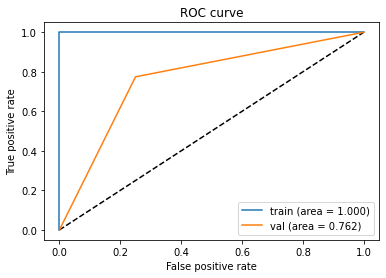

In [63]:
roc_auc_plot(y_train, y_train,y_test, y_pred)

Text(69.0, 0.5, 'Truth')

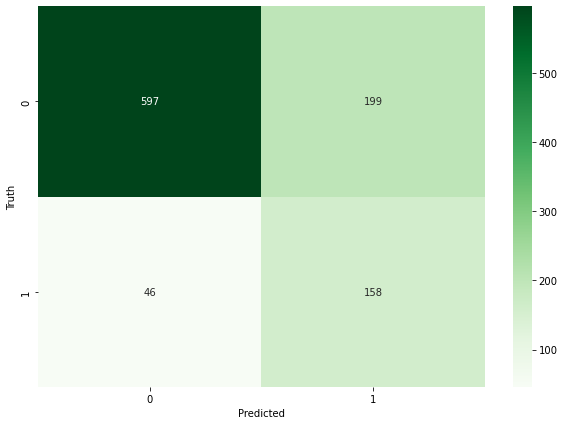

In [64]:
cm = tf.math. confusion_matrix(labels= y_test, predictions= y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot= True, fmt= 'd', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [65]:
model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = Adam(learning_rate=0.02)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [66]:
model.fit(x = X_train, y = y_train, validation_data=(X_val,y_val), batch_size = 64, epochs = 500, class_weight=class_weights)

Epoch 1/500
134/134 [==============================] - 1s 2ms/step - loss: 0.6099 - recall: 0.6502 - val_loss: 0.4442 - val_recall: 0.5435
Epoch 2/500
134/134 [==============================] - 0s 1ms/step - loss: 0.5561 - recall: 0.7076 - val_loss: 0.5452 - val_recall: 0.8478
Epoch 3/500
134/134 [==============================] - 0s 1ms/step - loss: 0.5165 - recall: 0.7519 - val_loss: 0.5340 - val_recall: 0.7935
Epoch 4/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4977 - recall: 0.7438 - val_loss: 0.4198 - val_recall: 0.7391
Epoch 5/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4934 - recall: 0.7163 - val_loss: 0.4586 - val_recall: 0.7283
Epoch 6/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4853 - recall: 0.7249 - val_loss: 0.4714 - val_recall: 0.7826
Epoch 7/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4797 - recall: 0.7381 - val_loss: 0.4871 - val_recall: 0.7174
Epoch 8/500
134/134 [======

134/134 [==============================] - 0s 1ms/step - loss: 0.4611 - recall: 0.7507 - val_loss: 0.4606 - val_recall: 0.7500
Epoch 60/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4589 - recall: 0.7501 - val_loss: 0.4552 - val_recall: 0.7391
Epoch 61/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4578 - recall: 0.7530 - val_loss: 0.4774 - val_recall: 0.7500
Epoch 62/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4562 - recall: 0.7484 - val_loss: 0.4406 - val_recall: 0.7065
Epoch 63/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4600 - recall: 0.7605 - val_loss: 0.4113 - val_recall: 0.6957
Epoch 64/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4567 - recall: 0.7576 - val_loss: 0.4104 - val_recall: 0.7065
Epoch 65/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4570 - recall: 0.7507 - val_loss: 0.4407 - val_recall: 0.7717
Epoch 66/500
134/134 [===========

134/134 [==============================] - 0s 1ms/step - loss: 0.4516 - recall: 0.7570 - val_loss: 0.3963 - val_recall: 0.6848
Epoch 118/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4504 - recall: 0.7547 - val_loss: 0.3931 - val_recall: 0.6304
Epoch 119/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4550 - recall: 0.7501 - val_loss: 0.4289 - val_recall: 0.7174
Epoch 120/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4505 - recall: 0.7697 - val_loss: 0.4447 - val_recall: 0.7283
Epoch 121/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4472 - recall: 0.7616 - val_loss: 0.4092 - val_recall: 0.6957
Epoch 122/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4506 - recall: 0.7611 - val_loss: 0.3980 - val_recall: 0.7283
Epoch 123/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4488 - recall: 0.7748 - val_loss: 0.3975 - val_recall: 0.6739
Epoch 124/500
134/134 [====

134/134 [==============================] - 0s 1ms/step - loss: 0.4417 - recall: 0.7662 - val_loss: 0.4620 - val_recall: 0.7717
Epoch 176/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4378 - recall: 0.7685 - val_loss: 0.4522 - val_recall: 0.7826
Epoch 177/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4474 - recall: 0.7628 - val_loss: 0.4697 - val_recall: 0.7283
Epoch 178/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4428 - recall: 0.7622 - val_loss: 0.4251 - val_recall: 0.7174
Epoch 179/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4434 - recall: 0.7657 - val_loss: 0.4337 - val_recall: 0.7065
Epoch 180/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4414 - recall: 0.7766 - val_loss: 0.3887 - val_recall: 0.7065
Epoch 181/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4433 - recall: 0.7645 - val_loss: 0.4216 - val_recall: 0.7500
Epoch 182/500
134/134 [====

134/134 [==============================] - 0s 2ms/step - loss: 0.4381 - recall: 0.7720 - val_loss: 0.4346 - val_recall: 0.7283
Epoch 234/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4353 - recall: 0.7714 - val_loss: 0.4313 - val_recall: 0.7391
Epoch 235/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4399 - recall: 0.7657 - val_loss: 0.4894 - val_recall: 0.7609
Epoch 236/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4403 - recall: 0.7679 - val_loss: 0.4211 - val_recall: 0.6522
Epoch 237/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4384 - recall: 0.7725 - val_loss: 0.4105 - val_recall: 0.7283
Epoch 238/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4392 - recall: 0.7599 - val_loss: 0.4284 - val_recall: 0.6739
Epoch 239/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4402 - recall: 0.7657 - val_loss: 0.4143 - val_recall: 0.7174
Epoch 240/500
134/134 [====

134/134 [==============================] - 0s 2ms/step - loss: 0.4377 - recall: 0.7771 - val_loss: 0.4042 - val_recall: 0.6957
Epoch 292/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4467 - recall: 0.7777 - val_loss: 0.4199 - val_recall: 0.7283
Epoch 293/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4374 - recall: 0.7714 - val_loss: 0.4357 - val_recall: 0.7609
Epoch 294/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4353 - recall: 0.7783 - val_loss: 0.4219 - val_recall: 0.7065
Epoch 295/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4387 - recall: 0.7668 - val_loss: 0.4274 - val_recall: 0.7065
Epoch 296/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4360 - recall: 0.7668 - val_loss: 0.4343 - val_recall: 0.6957
Epoch 297/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4363 - recall: 0.7760 - val_loss: 0.4504 - val_recall: 0.7283
Epoch 298/500
134/134 [====

134/134 [==============================] - 0s 2ms/step - loss: 0.4354 - recall: 0.7737 - val_loss: 0.4129 - val_recall: 0.7283
Epoch 350/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4357 - recall: 0.7708 - val_loss: 0.4108 - val_recall: 0.6957
Epoch 351/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4376 - recall: 0.7731 - val_loss: 0.4835 - val_recall: 0.7717
Epoch 352/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4360 - recall: 0.7720 - val_loss: 0.4447 - val_recall: 0.7283
Epoch 353/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4365 - recall: 0.7679 - val_loss: 0.4333 - val_recall: 0.7174
Epoch 354/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4389 - recall: 0.7645 - val_loss: 0.4104 - val_recall: 0.7391
Epoch 355/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4395 - recall: 0.7886 - val_loss: 0.4189 - val_recall: 0.7065
Epoch 356/500
134/134 [====

134/134 [==============================] - 0s 2ms/step - loss: 0.4359 - recall: 0.7725 - val_loss: 0.4031 - val_recall: 0.6522
Epoch 408/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4346 - recall: 0.7668 - val_loss: 0.4108 - val_recall: 0.6957
Epoch 409/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4369 - recall: 0.7708 - val_loss: 0.4349 - val_recall: 0.7065
Epoch 410/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4353 - recall: 0.7743 - val_loss: 0.4679 - val_recall: 0.7391
Epoch 411/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4334 - recall: 0.7720 - val_loss: 0.4104 - val_recall: 0.7174
Epoch 412/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4328 - recall: 0.7668 - val_loss: 0.4947 - val_recall: 0.7935
Epoch 413/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4328 - recall: 0.7777 - val_loss: 0.4464 - val_recall: 0.7500
Epoch 414/500
134/134 [====

134/134 [==============================] - 0s 1ms/step - loss: 0.4318 - recall: 0.7708 - val_loss: 0.4197 - val_recall: 0.7174
Epoch 466/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4315 - recall: 0.7783 - val_loss: 0.4355 - val_recall: 0.6739
Epoch 467/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4301 - recall: 0.7714 - val_loss: 0.4120 - val_recall: 0.6739
Epoch 468/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4317 - recall: 0.7800 - val_loss: 0.4383 - val_recall: 0.7174
Epoch 469/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4316 - recall: 0.7743 - val_loss: 0.4356 - val_recall: 0.6957
Epoch 470/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4340 - recall: 0.7593 - val_loss: 0.4193 - val_recall: 0.6630
Epoch 471/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4354 - recall: 0.7760 - val_loss: 0.4176 - val_recall: 0.6739
Epoch 472/500
134/134 [====

In [67]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss    recall  val_loss  val_recall
0  0.609901  0.650201  0.444235    0.543478
1  0.556112  0.707639  0.545229    0.847826
2  0.516477  0.751867  0.533981    0.793478
3  0.497716  0.743825  0.419782    0.739130
4  0.493393  0.716255  0.458597    0.728261

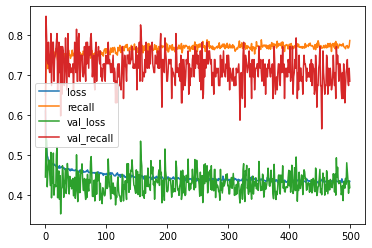

In [68]:
loss_df.plot()
plt.show()

In [69]:
y_predic = model.evaluate(X_test, y_test, verbose=0)

In [70]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.46221041679382324
recall:  0.720588207244873


In [71]:
print("Train")
y_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print("-------")
print("Test")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# it look like good than other previous 

Train
268/268 [==============================] - 0s 1ms/step
[[5638 1171]
 [ 398 1343]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      6809
           1       0.53      0.77      0.63      1741

    accuracy                           0.82      8550
   macro avg       0.73      0.80      0.75      8550
weighted avg       0.85      0.82      0.83      8550

-------
Test
32/32 [==============================] - 0s 1ms/step
[[644 152]
 [ 57 147]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       796
           1       0.49      0.72      0.58       204

    accuracy                           0.79      1000
   macro avg       0.71      0.76      0.72      1000
weighted avg       0.83      0.79      0.80      1000



In [72]:
roc_auc_score(y_test, y_pred)

0.7648167307123855

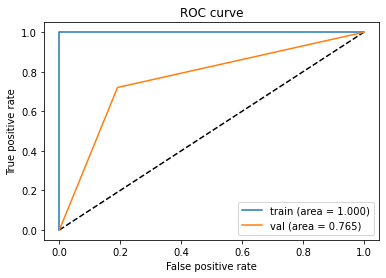

In [73]:
roc_auc_plot(y_train, y_train,y_test, y_pred)

Text(69.0, 0.5, 'Truth')

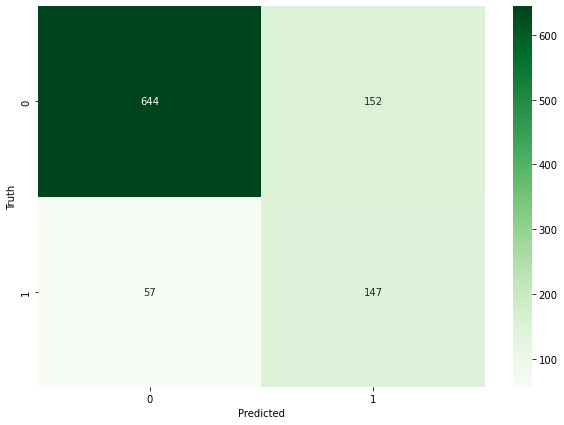

In [74]:
cm = tf.math. confusion_matrix(labels= y_test, predictions= y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot= True, fmt= 'd', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Add Dropout Layer

In [75]:
#tf.random.set_seed(42)

model = Sequential()
model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.02) # trying 0.009, 0.05, 0.01 and 0.02
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [76]:
model.fit(x = X_train, y = y_train, validation_data=(X_val,y_val), batch_size = 64, epochs = 500, class_weight=class_weights)

Epoch 1/500
134/134 [==============================] - 2s 4ms/step - loss: 0.6280 - recall: 0.6123 - val_loss: 0.4953 - val_recall: 0.5435
Epoch 2/500
134/134 [==============================] - 0s 2ms/step - loss: 0.5866 - recall: 0.6715 - val_loss: 0.6266 - val_recall: 0.8261
Epoch 3/500
134/134 [==============================] - 0s 2ms/step - loss: 0.5600 - recall: 0.6956 - val_loss: 0.5601 - val_recall: 0.8043
Epoch 4/500
134/134 [==============================] - 0s 2ms/step - loss: 0.5434 - recall: 0.6973 - val_loss: 0.4801 - val_recall: 0.7826
Epoch 5/500
134/134 [==============================] - 0s 2ms/step - loss: 0.5251 - recall: 0.7094 - val_loss: 0.4851 - val_recall: 0.7609
Epoch 6/500
134/134 [==============================] - 0s 2ms/step - loss: 0.5094 - recall: 0.7312 - val_loss: 0.4456 - val_recall: 0.7283
Epoch 7/500
134/134 [==============================] - 0s 2ms/step - loss: 0.5121 - recall: 0.7122 - val_loss: 0.5072 - val_recall: 0.7717
Epoch 8/500
134/134 [======

134/134 [==============================] - 0s 3ms/step - loss: 0.4838 - recall: 0.6847 - val_loss: 0.4752 - val_recall: 0.7283
Epoch 60/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4893 - recall: 0.6927 - val_loss: 0.4664 - val_recall: 0.7174
Epoch 61/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4900 - recall: 0.7007 - val_loss: 0.4504 - val_recall: 0.7065
Epoch 62/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4856 - recall: 0.6973 - val_loss: 0.4326 - val_recall: 0.6848
Epoch 63/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4842 - recall: 0.7076 - val_loss: 0.4193 - val_recall: 0.7065
Epoch 64/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4895 - recall: 0.6795 - val_loss: 0.4006 - val_recall: 0.6739
Epoch 65/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4898 - recall: 0.7065 - val_loss: 0.4120 - val_recall: 0.6087
Epoch 66/500
134/134 [===========

134/134 [==============================] - 0s 2ms/step - loss: 0.4872 - recall: 0.6743 - val_loss: 0.4500 - val_recall: 0.7391
Epoch 118/500
134/134 [==============================] - 0s 3ms/step - loss: 0.4870 - recall: 0.6927 - val_loss: 0.4372 - val_recall: 0.7065
Epoch 119/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4867 - recall: 0.6973 - val_loss: 0.4202 - val_recall: 0.6304
Epoch 120/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4904 - recall: 0.6801 - val_loss: 0.4299 - val_recall: 0.6630
Epoch 121/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4896 - recall: 0.6904 - val_loss: 0.4365 - val_recall: 0.6304
Epoch 122/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4851 - recall: 0.6927 - val_loss: 0.4116 - val_recall: 0.7065
Epoch 123/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4807 - recall: 0.6881 - val_loss: 0.4613 - val_recall: 0.6522
Epoch 124/500
134/134 [====

134/134 [==============================] - 0s 2ms/step - loss: 0.4920 - recall: 0.7145 - val_loss: 0.3809 - val_recall: 0.6957
Epoch 176/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4813 - recall: 0.6967 - val_loss: 0.5038 - val_recall: 0.7174
Epoch 177/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4856 - recall: 0.7071 - val_loss: 0.4633 - val_recall: 0.7283
Epoch 178/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4885 - recall: 0.7117 - val_loss: 0.4992 - val_recall: 0.7283
Epoch 179/500
134/134 [==============================] - 0s 3ms/step - loss: 0.4841 - recall: 0.7002 - val_loss: 0.4396 - val_recall: 0.7065
Epoch 180/500
134/134 [==============================] - 0s 3ms/step - loss: 0.4847 - recall: 0.6910 - val_loss: 0.4641 - val_recall: 0.7283
Epoch 181/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4836 - recall: 0.7071 - val_loss: 0.4581 - val_recall: 0.6957
Epoch 182/500
134/134 [====

134/134 [==============================] - 0s 2ms/step - loss: 0.4813 - recall: 0.6847 - val_loss: 0.4655 - val_recall: 0.7391
Epoch 234/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4825 - recall: 0.7295 - val_loss: 0.4164 - val_recall: 0.7391
Epoch 235/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4876 - recall: 0.7266 - val_loss: 0.4409 - val_recall: 0.7391
Epoch 236/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4828 - recall: 0.7237 - val_loss: 0.4206 - val_recall: 0.7391
Epoch 237/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4859 - recall: 0.6962 - val_loss: 0.4647 - val_recall: 0.6739
Epoch 238/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4834 - recall: 0.6996 - val_loss: 0.4353 - val_recall: 0.6739
Epoch 239/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4862 - recall: 0.6588 - val_loss: 0.4429 - val_recall: 0.6304
Epoch 240/500
134/134 [====

134/134 [==============================] - 0s 2ms/step - loss: 0.4935 - recall: 0.6755 - val_loss: 0.4369 - val_recall: 0.7174
Epoch 292/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4908 - recall: 0.6927 - val_loss: 0.4378 - val_recall: 0.7174
Epoch 293/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4867 - recall: 0.7076 - val_loss: 0.4073 - val_recall: 0.7174
Epoch 294/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4842 - recall: 0.7007 - val_loss: 0.4063 - val_recall: 0.6739
Epoch 295/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4829 - recall: 0.6893 - val_loss: 0.4068 - val_recall: 0.6739
Epoch 296/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4786 - recall: 0.6904 - val_loss: 0.4351 - val_recall: 0.7065
Epoch 297/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4881 - recall: 0.6646 - val_loss: 0.4473 - val_recall: 0.6522
Epoch 298/500
134/134 [====

134/134 [==============================] - 0s 2ms/step - loss: 0.4827 - recall: 0.7025 - val_loss: 0.4050 - val_recall: 0.6522
Epoch 350/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4774 - recall: 0.6973 - val_loss: 0.4508 - val_recall: 0.7283
Epoch 351/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4782 - recall: 0.6990 - val_loss: 0.4133 - val_recall: 0.6522
Epoch 352/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4896 - recall: 0.6824 - val_loss: 0.4791 - val_recall: 0.7609
Epoch 353/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4914 - recall: 0.7002 - val_loss: 0.3901 - val_recall: 0.6522
Epoch 354/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4868 - recall: 0.7076 - val_loss: 0.5171 - val_recall: 0.7391
Epoch 355/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4820 - recall: 0.7082 - val_loss: 0.4156 - val_recall: 0.6848
Epoch 356/500
134/134 [====

134/134 [==============================] - 0s 2ms/step - loss: 0.4786 - recall: 0.6933 - val_loss: 0.4054 - val_recall: 0.7065
Epoch 408/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4838 - recall: 0.6875 - val_loss: 0.4626 - val_recall: 0.7174
Epoch 409/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4777 - recall: 0.6944 - val_loss: 0.3850 - val_recall: 0.6957
Epoch 410/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4741 - recall: 0.7013 - val_loss: 0.4458 - val_recall: 0.7065
Epoch 411/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4836 - recall: 0.6783 - val_loss: 0.4905 - val_recall: 0.8261
Epoch 412/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4711 - recall: 0.7036 - val_loss: 0.3871 - val_recall: 0.7283
Epoch 413/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4860 - recall: 0.7151 - val_loss: 0.4491 - val_recall: 0.6848
Epoch 414/500
134/134 [====

134/134 [==============================] - 0s 2ms/step - loss: 0.4821 - recall: 0.7341 - val_loss: 0.4389 - val_recall: 0.6522
Epoch 466/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4876 - recall: 0.6875 - val_loss: 0.4432 - val_recall: 0.7174
Epoch 467/500
134/134 [==============================] - 0s 1ms/step - loss: 0.4796 - recall: 0.7226 - val_loss: 0.4346 - val_recall: 0.6957
Epoch 468/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4811 - recall: 0.6904 - val_loss: 0.4306 - val_recall: 0.7065
Epoch 469/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4869 - recall: 0.7099 - val_loss: 0.4671 - val_recall: 0.6848
Epoch 470/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4774 - recall: 0.6743 - val_loss: 0.4261 - val_recall: 0.7174
Epoch 471/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4814 - recall: 0.7042 - val_loss: 0.4403 - val_recall: 0.6957
Epoch 472/500
134/134 [====

In [77]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss    recall  val_loss  val_recall
0  0.628019  0.612292  0.495272    0.543478
1  0.586595  0.671453  0.626648    0.826087
2  0.559988  0.695577  0.560080    0.804348
3  0.543405  0.697300  0.480090    0.782609
4  0.525146  0.709362  0.485092    0.760870

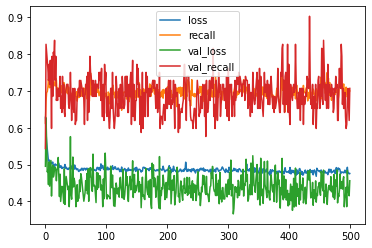

In [78]:
loss_df.plot()
plt.show()

In [79]:
y_predict = model.evaluate(X_test, y_test, verbose=0)

In [80]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.4828968942165375
recall:  0.7009803652763367


In [81]:
print("Train")
y_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print("-------")
print("Test")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#overfittong

Train
268/268 [==============================] - 0s 978us/step
[[5625 1184]
 [ 478 1263]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      6809
           1       0.52      0.73      0.60      1741

    accuracy                           0.81      8550
   macro avg       0.72      0.78      0.74      8550
weighted avg       0.84      0.81      0.82      8550

-------
Test
32/32 [==============================] - 0s 1ms/step
[[643 153]
 [ 61 143]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       796
           1       0.48      0.70      0.57       204

    accuracy                           0.79      1000
   macro avg       0.70      0.75      0.71      1000
weighted avg       0.83      0.79      0.80      1000



In [82]:
y_pred = model.predict(X_test)

32/32 [==============================] - 0s 1ms/step


In [83]:
y_train_pred = model.predict(X_train)

268/268 [==============================] - 0s 981us/step


In [84]:
roc_auc_score(y_test, y_pred)

0.8551612227805695

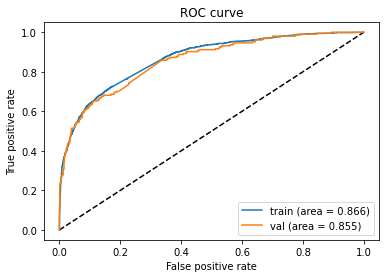

In [85]:
roc_auc_plot(y_train, y_train_pred, y_test, y_pred)

Text(69.0, 0.5, 'Truth')

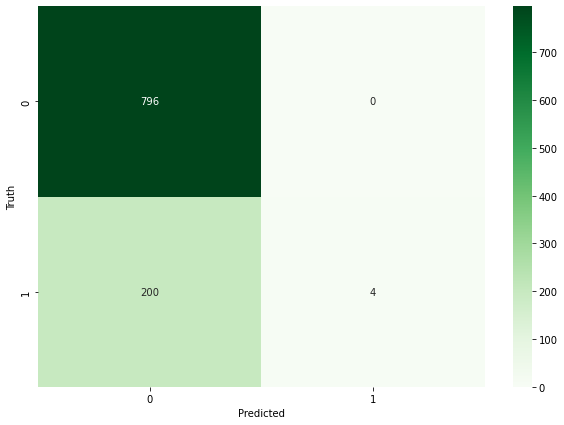

In [86]:
cm = tf.math. confusion_matrix(labels= y_test, predictions= y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot= True, fmt= 'd', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Add Early Stop

#### Monitor the "val_loss" as metric

In [87]:
#tf.random.set_seed(42)

model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.02)
model.compile(optimizer=opt ,loss="binary_crossentropy",metrics=["Recall"])

In [88]:
early_stop = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=10,restore_best_weights=True)

In [89]:
model.fit(x=X_train,y=y_train,validation_data=(X_val,y_val),batch_size=64,epochs=500,verbose=1,callbacks=[early_stop],)

Epoch 1/500
134/134 [==============================] - 1s 3ms/step - loss: 0.4850 - recall: 0.0046 - val_loss: 0.4448 - val_recall: 0.0000e+00
Epoch 2/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4297 - recall: 0.1712 - val_loss: 0.4057 - val_recall: 0.2174
Epoch 3/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4007 - recall: 0.3176 - val_loss: 0.3648 - val_recall: 0.3370
Epoch 4/500
134/134 [==============================] - 0s 2ms/step - loss: 0.3769 - recall: 0.3383 - val_loss: 0.3595 - val_recall: 0.4891
Epoch 5/500
134/134 [==============================] - 0s 2ms/step - loss: 0.3631 - recall: 0.3693 - val_loss: 0.3506 - val_recall: 0.4130
Epoch 6/500
134/134 [==============================] - 0s 2ms/step - loss: 0.3599 - recall: 0.3912 - val_loss: 0.3501 - val_recall: 0.3804
Epoch 7/500
134/134 [==============================] - 0s 2ms/step - loss: 0.3594 - recall: 0.3860 - val_loss: 0.3430 - val_recall: 0.4130
Epoch 8/500
134/134 [==

In [90]:
y_predict = model.evaluate(X_test, y_test, verbose=0)

In [91]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", recall)

loss:  0.34871816635131836
Recall:  0.46568626165390015


In [92]:
print("Train")
y_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print("-------")
print("Test")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


#no overfitting nor underfitting

Train
268/268 [==============================] - 0s 705us/step
[[6566  243]
 [ 951  790]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      6809
           1       0.76      0.45      0.57      1741

    accuracy                           0.86      8550
   macro avg       0.82      0.71      0.74      8550
weighted avg       0.85      0.86      0.85      8550

-------
Test
32/32 [==============================] - 0s 788us/step
[[768  28]
 [109  95]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.77      0.47      0.58       204

    accuracy                           0.86      1000
   macro avg       0.82      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



In [93]:
roc_auc_score(y_test, y_pred)

0.7152551975564095

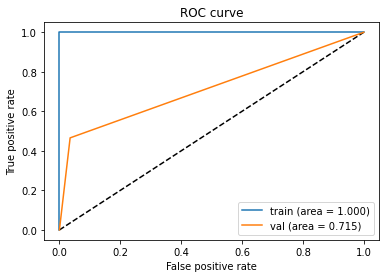

In [94]:
roc_auc_plot(y_train, y_train,y_test, y_pred)

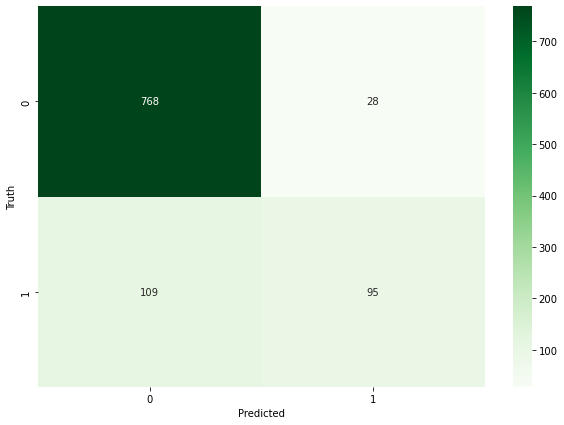

In [95]:
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot= True, fmt= 'd', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()


#### Monitor the "val_recall" as metric

In [96]:
#tf.random.set_seed(42)

model = Sequential()
model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = Adam(learning_rate=0.02)

model.compile(optimizer=opt,loss="binary_crossentropy",metrics=["Recall"])

In [97]:
early_stop = EarlyStopping(monitor="val_recall",mode="max",verbose=1,patience=15,restore_best_weights=True)

In [98]:
model.fit(x=X_train,y=y_train,validation_data=(X_val,y_val),batch_size=64,epochs=500,verbose=1,callbacks=[early_stop],)

Epoch 1/500
134/134 [==============================] - 1s 2ms/step - loss: 0.4501 - recall: 0.1350 - val_loss: 0.3871 - val_recall: 0.4239
Epoch 2/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3907 - recall: 0.3446 - val_loss: 0.3829 - val_recall: 0.3587
Epoch 3/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3667 - recall: 0.3843 - val_loss: 0.3483 - val_recall: 0.4239
Epoch 4/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3624 - recall: 0.3814 - val_loss: 0.3419 - val_recall: 0.5109
Epoch 5/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3576 - recall: 0.4038 - val_loss: 0.3489 - val_recall: 0.4348
Epoch 6/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3547 - recall: 0.3877 - val_loss: 0.3610 - val_recall: 0.3152
Epoch 7/500
134/134 [==============================] - 0s 1ms/step - loss: 0.3548 - recall: 0.3797 - val_loss: 0.3446 - val_recall: 0.3913
Epoch 8/500
134/134 [======

In [99]:
y_predic = model.evaluate(X_test, y_test, verbose=0)
y_predic

[0.3464410603046417, 0.5147058963775635]

In [100]:
loss,  recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.3464410603046417
recall:  0.5147058963775635


In [101]:
print("Train")
y_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print("-------")
print("Test")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#no overfitting nor underfitting

Train
268/268 [==============================] - 0s 1ms/step
[[6429  380]
 [ 844  897]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6809
           1       0.70      0.52      0.59      1741

    accuracy                           0.86      8550
   macro avg       0.79      0.73      0.75      8550
weighted avg       0.85      0.86      0.85      8550

-------
Test
32/32 [==============================] - 0s 782us/step
[[755  41]
 [ 99 105]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       796
           1       0.72      0.51      0.60       204

    accuracy                           0.86      1000
   macro avg       0.80      0.73      0.76      1000
weighted avg       0.85      0.86      0.85      1000



In [102]:
roc_auc_score(y_test, y_pred)

0.7315991723322495

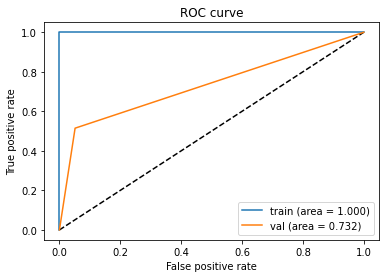

In [103]:
roc_auc_plot(y_train, y_train,y_test, y_pred)

Text(69.0, 0.5, 'Truth')

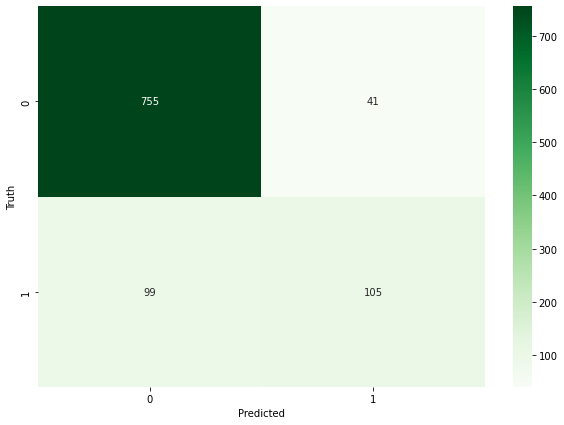

In [104]:
cm = tf.math. confusion_matrix(labels= y_test, predictions= y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot= True, fmt= 'd', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Optuna

In [ ]:
#from tensorflow.keras import regularizers

In [105]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=10,
                           restore_best_weights=True)

In [106]:
trial_metric =["Recall"]
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    n_units3 = trial.suggest_int("n_units3", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1.3e-1, log = True)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1,
                    input_dim=X_train.shape[1],
                    activation="relu"))
    model.add(Dense(n_units2,
                    activation="relu"))
    model.add(Dense(n_units3,
                    activation="relu"))
    model.add(Dense(1,
                    activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_float("w0", 0.01, 5 ,log = True)
    w1 = trial.suggest_float("w1", 0.01, 5 ,log = True)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=500,
        callbacks=[early_stop],
        class_weight=class_weights,
        verbose=0,
    )
    score = model.evaluate(X_train, y_train, verbose=0)[1]
    return score

In [107]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 22:46:38,550] A new study created in memory with name: no-name-fd66815d-17fb-478c-b54b-ed0f890cac3c
C:\ProgramData\Anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_experimental.adam.Adam'> which is of type type.
  warnings.warn(message)
C:\ProgramData\Anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
C:\ProgramData\Anaconda3\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.o

Restoring model weights from the end of the best epoch: 16.
Epoch 26: early stopping


[I 2023-10-30 22:46:43,923] Trial 0 finished with value: 0.8093050122261047 and parameters: {'n_units1': 106, 'n_units2': 25, 'n_units3': 51, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 0.0002646823600453809, 'w0': 1.4998163368221493, 'w1': 0.014702556290954362}. Best is trial 0 with value: 0.8093050122261047.


Restoring model weights from the end of the best epoch: 8.
Epoch 18: early stopping


[I 2023-10-30 22:46:47,858] Trial 1 finished with value: 0.7754164338111877 and parameters: {'n_units1': 27, 'n_units2': 41, 'n_units3': 57, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 0.0005497712782569732, 'w0': 0.4016219647826715, 'w1': 0.2003933185216977}. Best is trial 0 with value: 0.8093050122261047.


Restoring model weights from the end of the best epoch: 68.
Epoch 78: early stopping


[I 2023-10-30 22:47:02,762] Trial 2 finished with value: 0.6875358819961548 and parameters: {'n_units1': 63, 'n_units2': 41, 'n_units3': 100, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 0.009898186972139763, 'w0': 0.011004018006071628, 'w1': 2.746782941955511}. Best is trial 0 with value: 0.8093050122261047.


Restoring model weights from the end of the best epoch: 6.
Epoch 16: early stopping


[I 2023-10-30 22:47:06,602] Trial 3 finished with value: 0.7242963910102844 and parameters: {'n_units1': 84, 'n_units2': 66, 'n_units3': 75, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 0.00010492269014686423, 'w0': 4.290998664334833, 'w1': 4.7572186198109865}. Best is trial 0 with value: 0.8093050122261047.


Restoring model weights from the end of the best epoch: 3.
Epoch 13: early stopping


[I 2023-10-30 22:47:09,753] Trial 4 finished with value: 0.8408960103988647 and parameters: {'n_units1': 26, 'n_units2': 25, 'n_units3': 56, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 0.019656456142310413, 'w0': 0.02234871919005779, 'w1': 0.07117578898236115}. Best is trial 4 with value: 0.8408960103988647.


Restoring model weights from the end of the best epoch: 4.
Epoch 14: early stopping


[I 2023-10-30 22:47:13,605] Trial 5 finished with value: 0.8093050122261047 and parameters: {'n_units1': 59, 'n_units2': 116, 'n_units3': 25, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 0.0006806842394460859, 'w0': 0.2278339003025669, 'w1': 0.024897532772311267}. Best is trial 4 with value: 0.8408960103988647.


Restoring model weights from the end of the best epoch: 4.
Epoch 14: early stopping


[I 2023-10-30 22:47:17,377] Trial 6 finished with value: 0.8793796896934509 and parameters: {'n_units1': 58, 'n_units2': 120, 'n_units3': 123, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 0.07756853411124819, 'w0': 0.0612782335549725, 'w1': 0.1969041965640924}. Best is trial 6 with value: 0.8793796896934509.


Restoring model weights from the end of the best epoch: 3.
Epoch 13: early stopping


[I 2023-10-30 22:47:20,539] Trial 7 finished with value: 0.8627225756645203 and parameters: {'n_units1': 9, 'n_units2': 44, 'n_units3': 59, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 0.011825391231332439, 'w0': 3.0398083434614036, 'w1': 0.1531786993446213}. Best is trial 6 with value: 0.8793796896934509.


Restoring model weights from the end of the best epoch: 8.
Epoch 18: early stopping


[I 2023-10-30 22:47:26,311] Trial 8 finished with value: 0.8230901956558228 and parameters: {'n_units1': 72, 'n_units2': 63, 'n_units3': 106, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.0007147121508143273, 'w0': 2.29011144067446, 'w1': 0.01045405587492365}. Best is trial 6 with value: 0.8793796896934509.


Restoring model weights from the end of the best epoch: 2.
Epoch 12: early stopping


[I 2023-10-30 22:47:29,592] Trial 9 finished with value: 0.685812771320343 and parameters: {'n_units1': 38, 'n_units2': 57, 'n_units3': 35, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 0.00015264138786516356, 'w0': 0.24673959233010037, 'w1': 0.0553341291112066}. Best is trial 6 with value: 0.8793796896934509.


{'n_units1': 58,
 'n_units2': 120,
 'n_units3': 123,
 'optimizer': keras.optimizers.optimizer_experimental.rmsprop.RMSprop,
 'learning_rate': 0.07756853411124819,
 'w0': 0.0612782335549725,
 'w1': 0.1969041965640924}

In [108]:
# build model with optuna parameters
unit1, unit2, unit3, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1,  activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(unit3, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=500,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/500
134/134 [==============================] - 1s 2ms/step - loss: 1.1633 - recall: 0.0253 - val_loss: 0.4727 - val_recall: 0.0870
Epoch 2/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4714 - recall: 0.1442 - val_loss: 0.4240 - val_recall: 0.1413
Epoch 3/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4370 - recall: 0.1976 - val_loss: 0.4304 - val_recall: 0.4891
Epoch 4/500
134/134 [==============================] - 0s 2ms/step - loss: 0.4101 - recall: 0.2998 - val_loss: 0.3809 - val_recall: 0.4130
Epoch 5/500
134/134 [==============================] - 0s 2ms/step - loss: 0.3915 - recall: 0.3515 - val_loss: 0.3940 - val_recall: 0.1739
Epoch 6/500
134/134 [==============================] - 0s 2ms/step - loss: 0.3865 - recall: 0.3567 - val_loss: 0.3682 - val_recall: 0.4348
Epoch 7/500
134/134 [==============================] - 0s 2ms/step - loss: 0.3811 - recall: 0.3521 - val_loss: 0.3629 - val_recall: 0.3696
Epoch 8/500
134/134 [======

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [109]:
history = model.history.history

In [110]:
optuna.visualization.plot_optimization_history(study)

In [111]:
print("Train")
y_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print("-------")
print("Test")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train
268/268 [==============================] - 0s 818us/step
[[5629 1180]
 [ 579 1162]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.86      6809
           1       0.50      0.67      0.57      1741

    accuracy                           0.79      8550
   macro avg       0.70      0.75      0.72      8550
weighted avg       0.82      0.79      0.80      8550

-------
Test
32/32 [==============================] - 0s 525us/step
[[645 151]
 [ 76 128]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       796
           1       0.46      0.63      0.53       204

    accuracy                           0.77      1000
   macro avg       0.68      0.72      0.69      1000
weighted avg       0.81      0.77      0.79      1000



In [112]:
roc_auc_score(y_test, y_pred)

0.7188762439649227

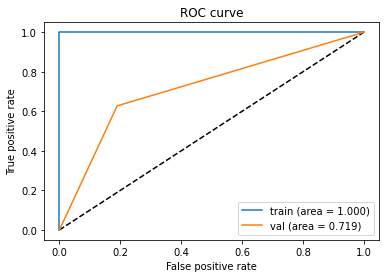

In [113]:
roc_auc_plot(y_train, y_train,y_test, y_pred)

Text(69.0, 0.5, 'Truth')

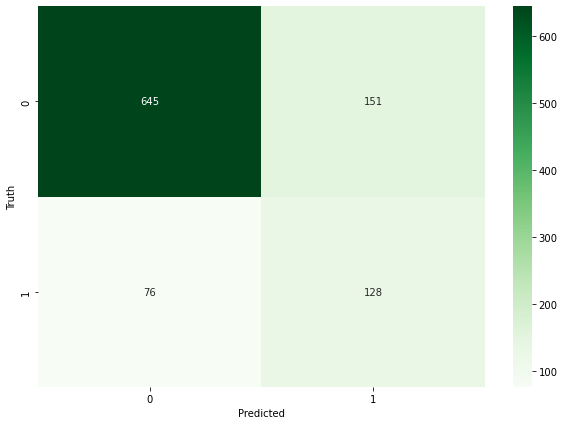

In [114]:
cm = tf.math. confusion_matrix(labels= y_test, predictions= y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot= True, fmt= 'd', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [115]:
loss,Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", Recall)

loss:  0.4846072494983673
recall:  0.6274510025978088


# Final Model and Model Deployment

In [116]:
import pickle
from tensorflow.keras.models import load_model

In [117]:
pickle.dump(column_trans, open("column_trans_ANN2", "wb"))

In [118]:
X = df.drop('Exited', axis = 1)
y = df['Exited'].values

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y, 
                                                    test_size=0.1, 
                                                    random_state=42)

In [120]:
X_train = column_trans.fit_transform (X_train)
X_test = column_trans.transform (X_test)

In [121]:
study.best_params

{'n_units1': 58,
 'n_units2': 120,
 'n_units3': 123,
 'optimizer': keras.optimizers.optimizer_experimental.rmsprop.RMSprop,
 'learning_rate': 0.07756853411124819,
 'w0': 0.0612782335549725,
 'w1': 0.1969041965640924}

In [122]:
model = Sequential()

model.add(Dense(58, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(120, activation="relu"))
model.add(Dense(123, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

optimizer = RMSprop(learning_rate=0.07756853411124819)

model.compile(optimizer=optimizer, 
              loss="binary_crossentropy", 
              metrics=["Recall"])

In [125]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_test, y_test),
          callbacks=[early_stop], 
          batch_size=64, 
          epochs=500, 
          verbose=1,
          class_weight={0: 0.0612782335549725, 1: 0.1969041965640924})

Epoch 1/500
141/141 [==============================] - 1s 2ms/step - loss: 0.0713 - recall: 0.4223 - val_loss: 0.4775 - val_recall: 0.3333
Epoch 2/500
141/141 [==============================] - 0s 2ms/step - loss: 0.0550 - recall: 0.5292 - val_loss: 0.4784 - val_recall: 0.4167
Epoch 3/500
141/141 [==============================] - 0s 2ms/step - loss: 0.0484 - recall: 0.6001 - val_loss: 0.5238 - val_recall: 0.7941
Epoch 4/500
141/141 [==============================] - 0s 2ms/step - loss: 0.0466 - recall: 0.6525 - val_loss: 0.4471 - val_recall: 0.6275
Epoch 5/500
141/141 [==============================] - 0s 2ms/step - loss: 0.0456 - recall: 0.6618 - val_loss: 0.3885 - val_recall: 0.5686
Epoch 6/500
141/141 [==============================] - 0s 2ms/step - loss: 0.0459 - recall: 0.6530 - val_loss: 0.4324 - val_recall: 0.7402
Epoch 7/500
141/141 [==============================] - 0s 2ms/step - loss: 0.0456 - recall: 0.6645 - val_loss: 0.3930 - val_recall: 0.5245
Epoch 8/500
141/141 [======

In [126]:
print("Train")
y_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print("-------")
print("Test")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train
282/282 [==============================] - 0s 690us/step
[[4553 2614]
 [ 287 1546]]
              precision    recall  f1-score   support

           0       0.94      0.64      0.76      7167
           1       0.37      0.84      0.52      1833

    accuracy                           0.68      9000
   macro avg       0.66      0.74      0.64      9000
weighted avg       0.82      0.68      0.71      9000

-------
Test
32/32 [==============================] - 0s 680us/step
[[497 299]
 [ 29 175]]
              precision    recall  f1-score   support

           0       0.94      0.62      0.75       796
           1       0.37      0.86      0.52       204

    accuracy                           0.67      1000
   macro avg       0.66      0.74      0.63      1000
weighted avg       0.83      0.67      0.70      1000



In [127]:
loss,Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", Recall)

loss:  0.5653349757194519
recall:  0.8578431606292725


In [128]:
model.save("Classification_with_ANN_Churn_Prediction2.h5")

## Prediction

In [129]:
customer = [619 ,0 , 42 , 2 , 0, 1, 1 ,1 , 101349 , 1 ,0 , 0]
customer = np.array([customer])
scaler.fit_transform(customer)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [132]:
pred = model.predict(customer)
 
if pred[0] == 1:
    print('customer will leave')
else:
    print('customer will stay')

1/1 [==============================] - 0s 12ms/step
customer will leave


In [133]:
pred

array([[1.]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___